In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
# dataset real: churches:
# Link: hugging face: https://huggingface.co/datasets/tglcourse/lsun_church_train


# fake dataset: dalle3
# size: 512x512
# Link: hugging face: https://huggingface.co/datasets/laion/dalle-3-dataset


In [4]:
# The results for the datasets above, using code : https://github.com/rezashkv/gen-image-detector/blob/main/gradient/detect_local.py
# results in file: https://drive.google.com/drive/folders/1Ihtpg8b67Io9kVPiDBk_NlBOTQoFZyWw?usp=share_link


path_1 = '/content/drive/MyDrive/CMSC673/Final_presentation/Data/result_gradient_dalle_churches'

results_dataset = []
for name in os.listdir(path_1):
  results_dataset.append(name)

In [5]:
i = 0
for i, file_csv in enumerate(results_dataset):
  df1 = pd.read_csv(path_1 + '/' + file_csv)
  if file_csv[5:11] == 'church':
    new_col_name = 'real_' + file_csv[14:-4]
  else:
    new_col_name = 'fake_' + file_csv[13:-4]
  df1 = df1.rename(columns={"errors": new_col_name})
  if i == 0:
    df = df1
  else:
    df = df1.join(df)

In [6]:
df

,real_50,fake_50,fake_20,fake_100,real_75,real_100,real_20,fake_75
0,0.006667,0.004083,0.002148,0.012264,0.010182,0.017713,0.003821,0.006606
1,0.008553,0.009824,0.002021,0.010902,0.012400,0.015058,0.003758,0.006680
2,0.011356,0.004122,0.002070,0.013918,0.024223,0.028285,0.003666,0.006517
3,0.006892,0.004466,0.003040,0.009936,0.010686,0.016369,0.002195,0.006321
4,0.005698,0.000895,0.000841,0.001617,0.008671,0.010929,0.002439,0.001213
...,...,...,...,...,...,...,...,...
95,0.006297,0.004752,0.002675,0.017882,0.010601,0.009982,0.002156,0.008799
96,0.004938,0.006863,0.002577,0.017111,0.007285,0.006123,0.003235,0.012068
97,0.005381,0.005656,0.002221,0.016125,0.008227,0.011485,0.003174,0.010033
98,0.006579,0.001588,0.000977,0.003807,0.009137,0.014051,0.002263,0.002955


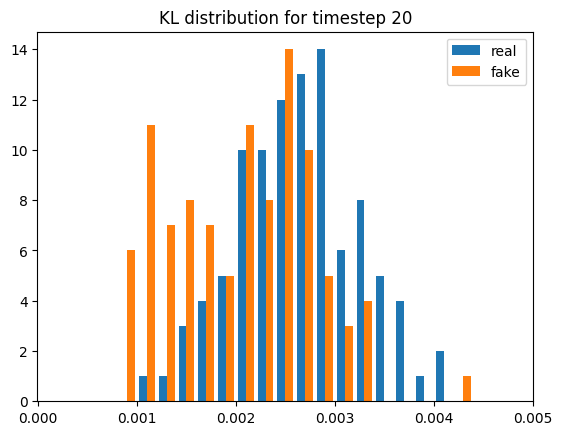

In [7]:
bins = [float(i) / 5000 for i in range(1, 25)]
plt.hist([df['real_20'], df['fake_20']], bins = bins)

plt.legend(['real', 'fake'])
plt.title("KL distribution for timestep 20")
plt.show()

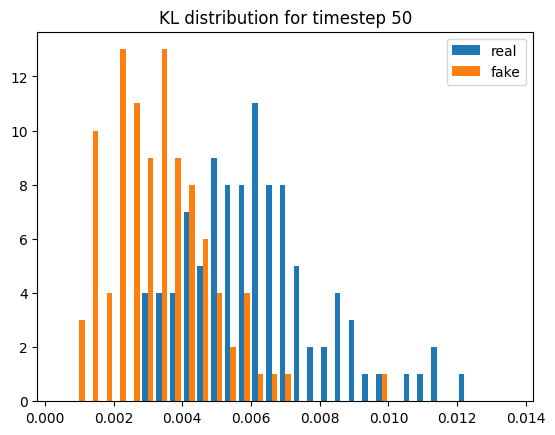

In [8]:
bins = [float(i) / 2500 for i in range(1, 35)]
plt.hist([df['real_50'], df['fake_50']], bins = bins)

plt.legend(['real', 'fake'])
plt.title("KL distribution for timestep 50")
plt.show()

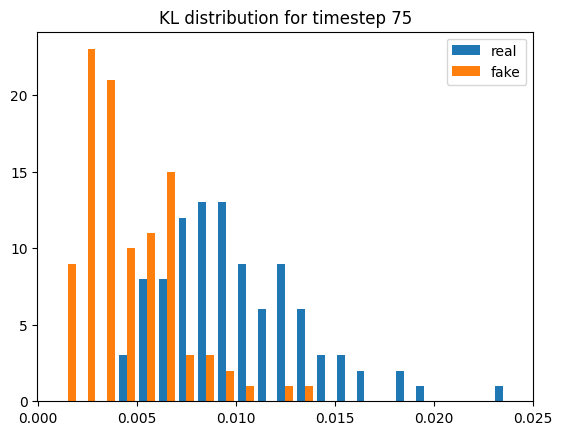

In [9]:
bins = [float(i) / 1000 for i in range(1, 25)]
plt.hist([df['real_75'], df['fake_75']], bins = bins)

plt.legend(['real', 'fake'])
plt.title("KL distribution for timestep 75")
plt.show()

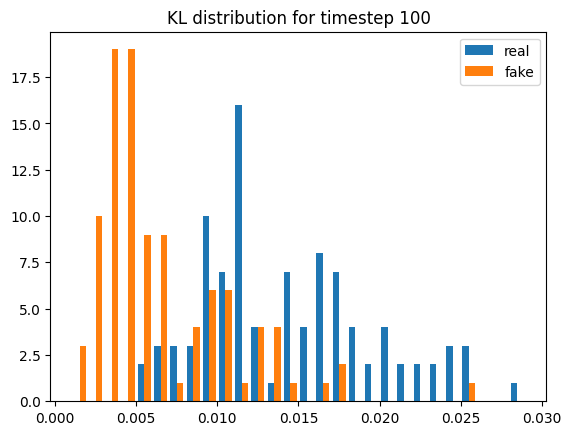

In [10]:
bins = [float(i) / 1000 for i in range(1, 30)]
plt.hist([df['real_100'], df['fake_100']], bins = bins)

plt.legend(['real', 'fake'])
plt.title("KL distribution for timestep 100")
plt.show()

In [11]:
def roc_graph(number_1, df):
  #roc
  errors_fake = list(df[f'fake_{number_1}'])
  errors_real =  list(df[f'real_{number_1}'])
  preds =  errors_fake + errors_real
  preds = [1 - pred for pred in preds]

  t_labels = [1] * len(errors_fake) + [0] * len(errors_real)

  fpr, tpr, thresholds = metrics.roc_curve(t_labels, preds)
  auc = metrics.auc(fpr, tpr)
  acc = np.max(1 - (fpr + (1 - tpr))/2)
  roc_auc = metrics.auc(fpr, tpr)

  err = .01
  low = tpr[np.where(fpr<.01)[0][-1]]

  print(low)
  # method I: plt
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.02f' % roc_auc)
  plt.plot(low, err, 'b', label = 'FPR@TPR < 0.01 = %0.02f' % low)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

20
0.15


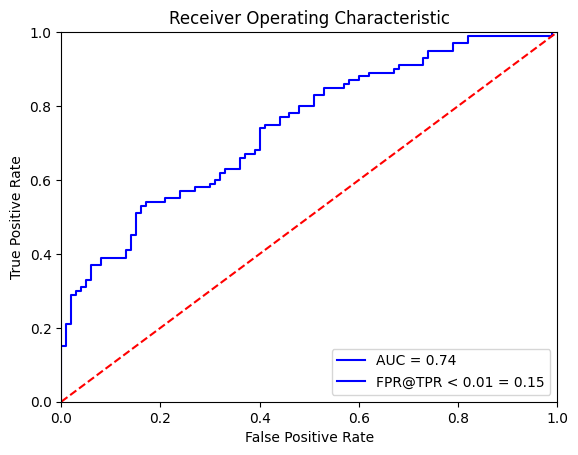

50
0.44


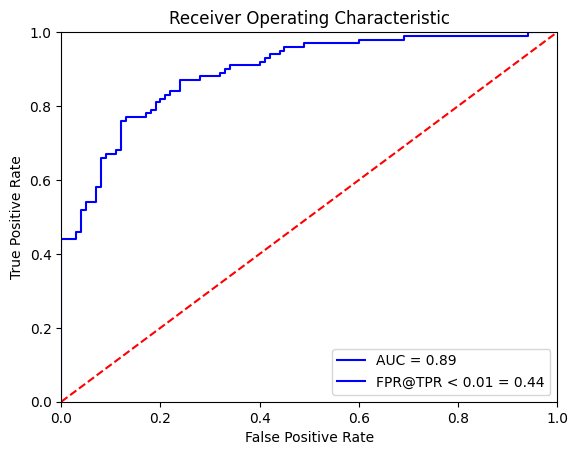

75
0.59


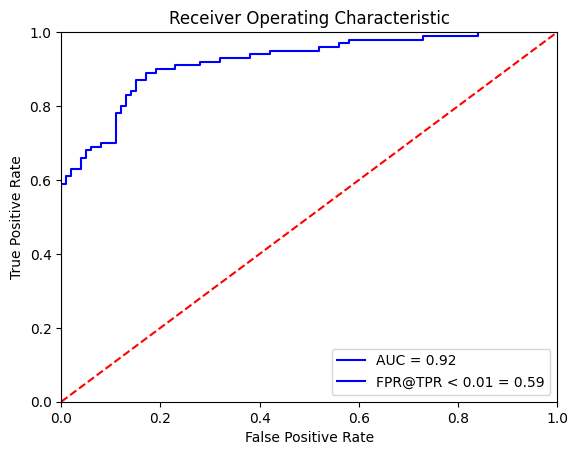

100
0.56


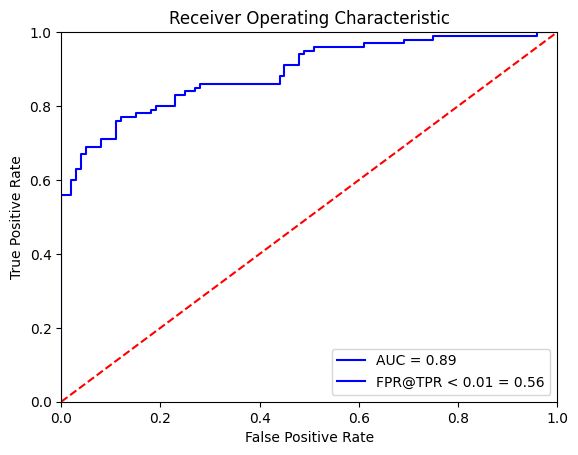

In [12]:
for i in [20,50,75,100]:
  print(i)
  roc_graph(i, df)